<a href="https://colab.research.google.com/github/avisinghal6/Graph-based-Recommender-System/blob/main/Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import numpy as np
import os
import random
import math 

In [131]:
G=nx.Graph()

In [132]:
os.getcwd()+'/data'

'/content/data'

In [133]:
dir=os.getcwd()+'/data'
videos_to_remove=[]
for filename in os.listdir(dir):
   with open(os.path.join(dir, filename), 'r') as f:
     for line in f.readlines():
      data=line.split("\t")
      related_id=data[9:]
      if len(related_id)>0:
        related_id[-1]=data[-1][:-1]
      
      if(len(data)==1):
        videos_to_remove.append(data[-1][:-1])
        continue
      G.add_node(data[0],uploader=data[1],age=data[2],category=data[3],length=data[4],views=data[5],rate=data[6],ratings=data[7],comments=data[8])
      for i in range(len(related_id)):
        G.add_edge(data[0],related_id[i])


In [134]:
for n in G.nodes():
  if bool(G.nodes[n])==False:
    videos_to_remove.append(n)

In [135]:
for i in videos_to_remove:
  try:
    G.remove_node(i)
  except:
    continue

In [136]:
videos_to_remove=[]
for n in G.nodes():
  if len(list(G.neighbors(n)))==0:
    videos_to_remove.append(n)

In [137]:
for i in videos_to_remove:
  try:
    G.remove_node(i)
  except:
    continue

In [138]:
G.number_of_edges()

131309

In [139]:
G.number_of_nodes()

48781

STATISTICS OF DATA CODE

In [24]:
import matplotlib.pyplot as plt

In [ ]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

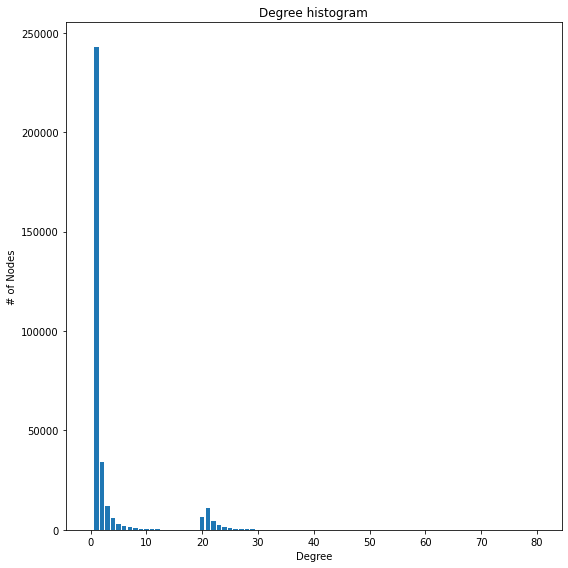

In [ ]:
fig = plt.figure("Degree of a random graph", figsize=(8, 8))
axgrid = fig.add_gridspec(1,1)
ax2 = fig.add_subplot(axgrid[0:, 0:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [22]:
import itertools
shortest_paths={}
shortest_paths[-1]=0
for u,v in G.edges():
  G.remove_edge(u,v)
  try:
    length=nx.shortest_path_length(G, source=u, target=v)
  except:
    shortest_paths[-1]=shortest_paths[-1]+1
    G.add_edge(u,v)
    continue
  
  if length in shortest_paths:
    shortest_paths[length]=shortest_paths[length]+1
  else:
    shortest_paths[length]=1
  G.add_edge(u,v)


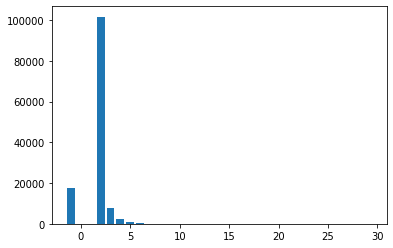

In [46]:
node_pairs=list(shortest_paths.keys())
shortest_path=list(shortest_paths.values())
plt.bar(node_pairs, shortest_path)
plt.show()

In [51]:
similar_neighbors={}
for n in G.nodes():
  node_genre=G.nodes[n]['category']
  count=0
  same=0
  for i in G.neighbors(n):
    count+=1
    if node_genre==G.nodes[i]['category'] :
      same+=1
  
  percent=same/count
  percent=round(percent*100)
  if percent in similar_neighbors:
    similar_neighbors[percent]=similar_neighbors[percent]+1
  else:
    similar_neighbors[percent]=1

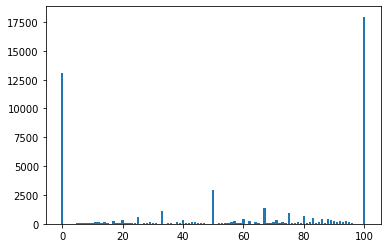

In [53]:
nodes=list(similar_neighbors.keys())
percentage=list(similar_neighbors.values())
plt.bar(nodes,percentage)
plt.show()

In [54]:
same_uploader={}
for n in G.nodes():
  uploader=G.nodes[n]['uploader']
  count=0
  same=0
  for i in G.neighbors(n):
    count+=1
    if uploader==G.nodes[i]['uploader'] :
      same+=1
  
  percent=same/count
  percent=round(percent*100)
  if percent in same_uploader:
    same_uploader[percent]=same_uploader[percent]+1
  else:
    same_uploader[percent]=1

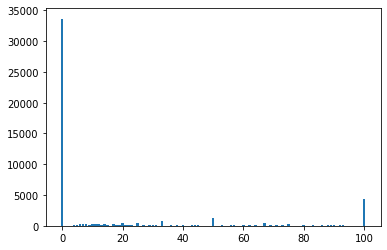

In [55]:
nodes=list(same_uploader.keys())
percentage=list(same_uploader.values())
plt.bar(nodes, percentage)
plt.show()

In [67]:
node_views={}
for n in G.nodes():
  node_views[int(G.nodes[n]['views'])]=G.degree[n]

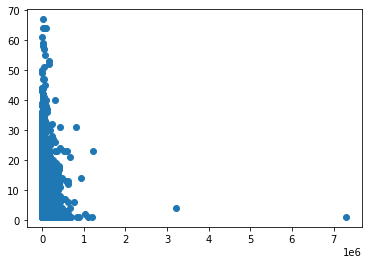

In [68]:
views=list(node_views.keys())
nodes=list(node_views.values())
plt.scatter(views, nodes)
plt.show()

7524

PIXIE RANDOM WALK CODE


In [170]:
def personalizedNeighbor(G,F,currentVideo,visited):
  n=G.neighbors(currentVideo)
  if len(list(G.neighbors(currentVideo)))==0:
    return -1
  probs=[]
  neighbors=[]
  count=0
  for i in G.neighbors(currentVideo):
    p=1
    neighbors.append(i)
    # if F['category']==G.nodes[i]['category']:
    #   p=p*1.5
    
    # if F['uploader']==G.nodes[i]['uploader']:
    #   p=p*1.5

    # p=p*(math.sqrt(math.log(int(G.nodes[i]['views'])+3)))

    # if currentVideo not in visited:
    #   p=p*1.5

    probs.append(p)
  
  total=sum(probs)
  probs=[x/total for x in probs]
  
  selected_node=np.random.choice(neighbors, 1,p=probs)[0]

  return selected_node
  

In [171]:
def chooseNeighbor(G):
  nodes=list(G.nodes)
  return random.choice(nodes)

In [172]:
def PixieRandomWalk(q,G,F,N_q,T,V):
  
  for i in G.nodes:
    V[i]=0

  for beta in T:
    currentVideo=q
    visited=set()
    for i in range(int(N_q/len(T))):
      visited.add(currentVideo)
      V[currentVideo]=V[currentVideo]+1
      teleport=random.uniform(0, 1)
      if teleport < beta :
        currentVideo=chooseNeighbor(G)
      else:
        currentVideo=personalizedNeighbor(G,F,currentVideo,visited)
      
      while currentVideo==-1:
        currentVideo=chooseNeighbor(G)
  return V

In [173]:
def PixieRandomWalkMultiple(Q,Nq,G,F,N,T):
  Vq=[]
  for i in range(len(Q)):
    Vq.append(PixieRandomWalk(Q[i],G,F,Nq[i],T,{}))
  
  VisitCounts={}
  for v in G.nodes():
    
    total=0
    for i in range(len(Q)):
      total+=math.sqrt(Vq[i][v])
      
    VisitCounts[v]=total*total
    
  return VisitCounts
    

In [174]:
#generates the query set Q and N_q for each query
def construct_query(G,N,currentVideo,threshold):

  query=[]
  Nq=[]
  max_degree=0
  Sq=[]

  for i in G.neighbors(currentVideo):

    rand=random.uniform(0, 1)

    if rand < threshold:
      query.append(i)
      max_degree=max(max_degree,G.degree[i])
      
  for i in query:
    sq= G.degree[i] * (max_degree- math.log(G.degree[i]))
    Sq.append(sq)
  
  total_Sq=sum(Sq)
  
  for i in range(len(Sq)):
    Nq.append(N*Sq[i]/total_Sq)
  

  return query,Nq

In [175]:
currentVideo='OOwP-s-89aU'
N=500
threshold=1
Q,Nq=construct_query(G,N,currentVideo,threshold)
F=G.nodes[currentVideo]
T=[0.5]

VisitCounts=PixieRandomWalkMultiple(Q,Nq,G,F,N,T)

In [176]:
# VisitCounts=sorted(VisitCounts,reverse=True)
# for i in VisitCounts.keys():
#   if(VisitCounts[i]>1):
#     print(VisitCounts[i])


DATASET CONSTRUCTION

In [140]:
import copy
G2=copy.deepcopy(G)
test_edges=[]

for i in G2.nodes:
  n=list(G2.neighbors(i))
  # print(n)
  five_percent=int(0.05*len(n))

  edge=random.sample(n,k=five_percent)
  for j in range(five_percent):
    test_edges.append((i,edge[j]))
    G2.remove_edge(i,edge[j])
      


In [141]:
import copy
G3=copy.deepcopy(G)
eval_edges=[]

for i in G3.nodes:
  n=list(G3.neighbors(i))
  # print(n)
  five_percent=int(0.05*len(n))

  edge=random.sample(n,k=five_percent)
  for j in range(five_percent):
    eval_edges.append((i,edge[j]))
    G3.remove_edge(i,edge[j])
      


In [180]:
debug=False
N=1000
threshold=0.2
accuracy=0
NUMBER_OF_NODES=G3.number_of_nodes()
for i in G3.nodes:
  edges=set()
  currentVideo=i
  for u,v in eval_edges:
    if u==currentVideo:
      edges.add(v)
    elif v==currentVideo:
      edges.add(u)
  
  if len(edges)==0:
    NUMBER_OF_NODES-=1
    continue
  Q,Nq=construct_query(G3,N,currentVideo,threshold)

  F=G3.nodes[currentVideo]
  T=[0]
  VisitCounts=PixieRandomWalkMultiple(Q,Nq,G3,F,N,T)
  # for j in VisitCounts.keys():
  #   if(VisitCounts[j]>1):
  #     print(VisitCounts[j])

  VisitCounts=sorted(VisitCounts.items(), key=lambda x:x[1],reverse=True)
  

  node_edges=set()
  for j in range(100):
    x,y=VisitCounts[j]
    node_edges.add(x)

  count=len(node_edges.intersection(edges))
  # print(count)
  accuracy+=count/len(edges)
  # print(accuracy)
  if debug:
    print(i)
    print(Q)
    print(edges)
    print(node_edges)
    print(count)
    break
accuracy/=NUMBER_OF_NODES

In [181]:
accuracy

0.5801258208201314